## 차원축소 

많은 경우 머신러닝 문제는 훈련 샘플 각각이 수천 심지어 수백만 개의 특성을 가지고 있다. 많은 특성은 훈련을 느리게 할 뿐만 아니라, 좋은 해결책을 찾기 어렵게 만든다. 이런 문제를 차원의 저주, curse of dimensionality 라고 한다. 

차원을 축소시키면 일부 정보가 유실 된다. 그래서 훈련 속도가 빨라질 수는 있지만 시스템의 성능이 나빠질 수 있다. 작업 파이프라인이 조금 더 복잡하게 되고 유지 관리가 어려워진다.그러므로 차원 축소를 고려하기 전에 훈련이 너무 느린지 먼저 원본 데이터로 시스템을 훈련해봐야 한다. 어떤 경우에는 훈련 데이터의 차원을 축소시키면 잡음이나 불필요한 세부사항을 걸러내므로 성능을 높일 수 있다. 일반적으로 훈련 속도만 빨라진다.   

훈련속도를 높이는 것 외에 차원 축소는 데이터 시각화에도 유용, 차원 수를 둘로 줄이면 고차원 훈련 세트를 하나의 압축된 그래프로 그릴 수 있고 군집 같은 시각적인 패턴을 감지해 중요한 통찰을 얻는 경우가 많다. 

## 차원 축소를 위한 접근 방법 

대부분의 문제는 훈련 샘플이 모든 차원에 걸쳐 균일하게 퍼져 있지 않다. 결과적으로 모든 훈련 샘플이 고차원 공간 안의 저차원 **부분공간,subspace**에 놓여 있다. 모든 훈련 샘플을 부분 공간에 수직으로 투영하면 3D고차원 데이터를 2D로 만들어 축소하여 사용할 수 있다. 하지만 투영이 언제나 최선의 방법은 아니다. 

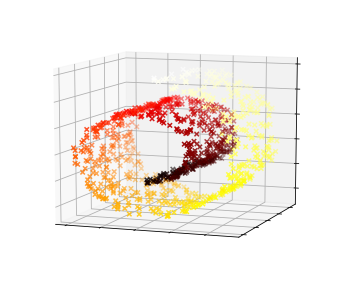

그림 처럼 부분 공간이 뒤틀리거나 휘어 있는 경우 투영을 이용하면 층이 서로 뭉개지게 된다. 

#### 매니폴드 학습 
2D 매니폴드는 고차원 공간에서 휘어지거나 튀틀린 2D 모양이다. 더 일반적으로 d차원 매니폴드는 국부적으로 d차원 표평면으로 보일 수 있는 n차원 공간의 일부이다. (d<n) 아래의 그림은 d= 2, n=3 
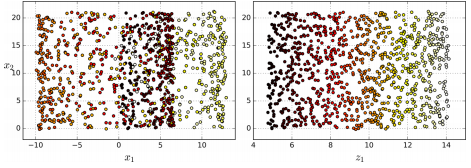

많은 차원 축소 알고리즘이 훈련 샘플이 놓여 있는 매니폴드를 모델링하는 식으로 작동한다. 저차원 매니폴드에 가깝게 놓여있다는 매니폴드 가정 또는 매니폴드 가설에 근거한다. 

## PCA 

주성분 분석은 데이터에 가장 가까운 초평면을 정의한 후 데이터를 이 평면에 투영시킨다. 

### 분산 보존 
저차원의 초평면에 훈련 세트를 투영하기 전에 먼저 올바른 초평명은 선택해야한다. 
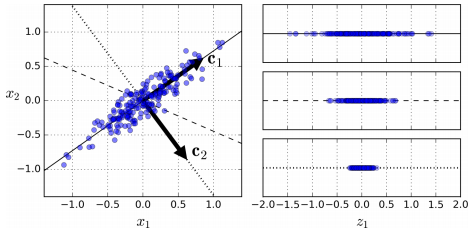
2D 데이터셋이 세 개의 축(1차원 초평면)과 함께 표현되어 있다. 오른쪽 그래프는 데이터셋이 각 축에 투영된 결과이다. 실선에 투영된 것은 분산을 최대한 보존하는 반면 점선에 투영된 것은 분산을 매우 적게 유지하고 있다. 가운데의 파선에 투영된 것은 분산을 중간정도로 유지하고 있다. 

다른 방향으로 투영하는 것보다 분산이 최대로 보존되는 축을 선택하는 것이 정보가 가장 적게 손실되므로 합리적이다. 이 선택은 다른 방식으로 설명하면 원본 데이터셋과 투영된 것 사이의 평균 제곱 거리를 최소화하는 축이다. 

PCA는 훈련 세트에서 분산이 최대인 축을 찾는다. 고차원 데이터셋이라면 PCA는 이전의 두축에 직교하는 축을 찾으며 데이터셋에 있는 차원의 수만 큼 n번째 축을 찾는다. i번째 축을 이 데이터의 i번째 주성분이라고 부른다. 

각 주성분을 위해 PCA는 주성분 방향을 가리키고 원점에 중앙이 맞춰진 단위 벡터를 찾는다. 하나의 축에 단위 벡터가 반대 방향으로 두개 있으므로 PCA가 반환하는 단위 벡터의 방향을 일정하지 않다. 훈련세트를 조금 섞은 다음 다시 PCA를 적용하면 새로운 PC중 일부가 원래 PC와 반대 방향일 수 있다. 그러나 일반적으로 같은 축에 놓여 있을 것이다. 어떤 경우에는 한쌍의 PC가 회전하거나 서로 바뀔 수 있지만 보통은 같은 평면을 구성한다. 

#### 훈련 세트의 주성분을 어떻게 찾을까? 
SVD, 특잇값분해라는 표준행렬 분해 기술을 사용해 훈련 세트 행렬 X를 세개의 행렬 곱셈인 $X = U \sum V^T$ 로 분해할 수 있다. 

$X = U \sum V^T$ 에서 $V$가 주성분

* (m, m) (m, n) (n, n)

m: 샘플 개수, n: 특성 개수

PCA는 데이터셋의 평균이 0이라고 가정, 사이킷런 PCA 파이썬 클래스는 작업 작업 대신 처리

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action='ignore')

In [2]:
np.random.seed(4)
m = 60
w1, w2 = 0.1, 0.3
noise = 0.1

angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
X = np.empty((m, 3))
X[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
X[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
X[:, 2] = X[:, 0] * w1 + X[:, 1] * w2 + noise * np.random.randn(m)

In [3]:
X_centered = X - X.mean(axis=0)
U, s, Vt = np.linalg.svd(X_centered)
c1 = Vt.T[:, 0]
c2 = Vt.T[:, 1]

In [4]:
m, n = X.shape

S = np.zeros(X_centered.shape)
S[:n, :n] = np.diag(s)

In [5]:
np.allclose(X_centered, U.dot(S).dot(Vt))

True

### d차원으로 투영
    
주성분을 모두 추출해냈다면 처음 d개의 주성분으로 정의한 추평면에 투영하여 데이터셋의 차원을 d차원을 축소시킬 수 있다. 이 초평면은 분산을 가능한 최대로 보존하는 투영임을 보장한다. 

$Xd proj = XWd$

In [6]:
W2 = Vt.T[:, :2]
X2D = X_centered.dot(W2)

In [7]:
X2D_using_svd = X2D

In [8]:
# 사이킷런 사용 
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X2D = pca.fit_transform(X)

In [9]:
X2D[:5]

array([[ 1.26203346,  0.42067648],
       [-0.08001485, -0.35272239],
       [ 1.17545763,  0.36085729],
       [ 0.89305601, -0.30862856],
       [ 0.73016287, -0.25404049]])

In [10]:
X2D_using_svd[:5]

array([[-1.26203346, -0.42067648],
       [ 0.08001485,  0.35272239],
       [-1.17545763, -0.36085729],
       [-0.89305601,  0.30862856],
       [-0.73016287,  0.25404049]])

In [11]:
# 데이터셋을 조금 다르게해서 PCA를 실행하면 결과가 달라질 것. 일반적으로 달라지는 것은 일부 축이 반대로 바뀌는 정도이다.
# 이 예에서 사이킷런의 PCA는 두 축이 반대로 뒤집힌 것외에는 SVD 방식을 사용한 것과 통일한 투영 결과를 만든다. 

np.allclose(X2D, -X2D_using_svd)

True

In [12]:
# 평면(PCA 2D 부분공간)에 투영된 3D 포인트를 복원
X3D_inv = pca.inverse_transform(X2D)

In [13]:
# 투영 단게에서 일부 정보를 잃어버리기 때문에 복원된 3D 포인트가 원본 3D 포인트와 완전히 똑같지는 않다.

np.allclose(X3D_inv, X)

False

In [14]:
# 재구성 오차를 계산

np.mean(np.sum(np.square(X3D_inv - X), axis=1))

0.01017033779284855

In [15]:
# SVD 방식의 역변환
X3D_inv_using_svd = X2D_using_svd.dot(Vt[:2, :])

In [16]:
# 사이킷런의 `PCA` 클래스는 자동으로 평균을 뺏던 것을 복원해주기 때문에 두 방식의 재구성 오차가 동일하지는 않습니다. 하지만 평균을 빼면 동일한 재구성을 얻을 수 있다.

np.allclose(X3D_inv_using_svd, X3D_inv - pca.mean_)

True

In [17]:
# 주성분 확인 
pca.components_

array([[-0.93636116, -0.29854881, -0.18465208],
       [ 0.34027485, -0.90119108, -0.2684542 ]])

In [18]:
Vt[:2]

array([[ 0.93636116,  0.29854881,  0.18465208],
       [-0.34027485,  0.90119108,  0.2684542 ]])

#### 설명된 분산의 비율 

explained_variance_ratio_ 변수에 저장된 주성분의 설명된 분산의 비율을 볼 수 있다. 이 비율은 각 주성분의 축을 따라 있는 데이터셋의 분산 비율을 나타낸다. 

In [19]:
pca.explained_variance_ratio_

array([0.84248607, 0.14631839])

데이터셋의 분사의 84%가 첫번째 pc를 따라 놓여 있고 14%가 두번째 pc를 따라 놓여있음을 볼 수 있다. 세번째 pc는 1.2% 미만이 남아 있을 것이므로 아주 적은 양의 정보가 들어있다고 생각해도 된다. 


In [20]:
# 2D로 투영했기 때문에 분산의 1.1%을 잃었다.

1 - pca.explained_variance_ratio_.sum()

0.011195535570688975

In [21]:
# SVD 방식을 사용했을 때 설명된 분산의 비율을 계산하는 방법`s`는 행렬 `S`의 대각 성분)
np.square(s) / np.square(s).sum()

array([0.84248607, 0.14631839, 0.01119554])

### 적절한 차원 수 선택 

축소할 차원 수를 임의로 정하기 보다는 충분한 분산이 될 때까지 더해야 할 차원 수를 선택하는 것이 간단하다. 데이터 시각화를 위해 차원을 축소하는 경우에는 차원을 2개나 3개로 줄이는 것이 일반적이다. 

In [22]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
mnist.target = mnist.target.astype(np.uint8)

In [23]:
from sklearn.model_selection import train_test_split

X = mnist["data"]
y = mnist["target"]

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [24]:
# 차원을 축소하지 않고 PCA를 계산한 뒤 훈련 세트의 분산을 95%로 유지하는데 필요한 최소한의 차원 수를 계산 

pca = PCA()
pca.fit(X_train)
cumsum = np.cumsum(pca.explained_variance_ratio_)
d = np.argmax(cumsum >= 0.95) + 1

In [25]:
# # 차원을 축소하지 않고 PCA를 계산한 뒤 훈련 세트의 분산을 95%로 유지하는데 필요한 최소한의 차원 수
d

154

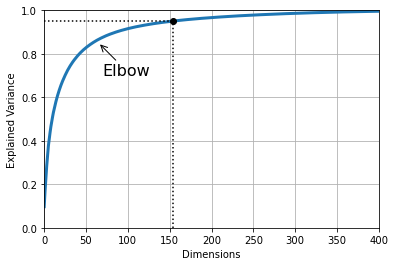

In [26]:
plt.figure(figsize=(6,4))
plt.plot(cumsum, linewidth=3)
plt.axis([0, 400, 0, 1])
plt.xlabel("Dimensions")
plt.ylabel("Explained Variance")
plt.plot([d, d], [0, 0.95], "k:")
plt.plot([0, d], [0.95, 0.95], "k:")
plt.plot(d, 0.95, "ko")
plt.annotate("Elbow", xy=(65, 0.85), xytext=(70, 0.7),
             arrowprops=dict(arrowstyle="->"), fontsize=16)
plt.grid(True)

plt.show()

유지하려는 주성분의 수를 지정하기보다는 보존하려는 분산의 비율을 n_components에 0.0 ~ 1.0 사이로 설정하는 편이 좋다.

In [27]:
pca = PCA(n_components= 0.95)
X_reduced = pca.fit_transform(X_train)

In [28]:
pca.n_components_

154

In [29]:
np.sum(pca.explained_variance_ratio_)

0.9503684424557437

### 압축을 위한 PCA

차원을 축소하고 난 후에는 훈련 세트의 크기가 줄어든다.  압축된 데이터셋에 PCA투영의 변환을 반대로 적용하여 차원을 되돌릴 수 있다. 하지만 투영에서 일정랼의 정보를 잃어버렸기 때문에 원본 데이터셋을 얻을 수는 없다. 원본 데이터와 재구성된 데이터 사이의 평균제곱거리를 재구성 오차하고 한다.

In [30]:
# 154차원으로 압축 후 inverse_transform을 사용해 복원 
pca = PCA(n_components=154)
X_reduced = pca.fit_transform(X_train)
X_recovered = pca.inverse_transform(X_reduced)

In [31]:
def plot_digits(instances, images_per_row=5, **options):
    
    import matplotlib as mpl
    
    size = 28
    images_per_row = min(len(instances), images_per_row)
    # n_rows = ceil(len(instances) / images_per_row) 와 동일합니다:
    n_rows = (len(instances) - 1) // images_per_row + 1

    # 필요하면 그리드 끝을 채우기 위해 빈 이미지를 추가합니다:
    n_empty = n_rows * images_per_row - len(instances)
    padded_instances = np.concatenate([instances, np.zeros((n_empty, size * size))], axis=0)

    # 배열의 크기를 바꾸어 28×28 이미지를 담은 그리드로 구성합니다:
    image_grid = padded_instances.reshape((n_rows, images_per_row, size, size))

    # 축 0(이미지 그리드의 수직축)과 2(이미지의 수직축)를 합치고 축 1과 3(두 수평축)을 합칩니다. 
    # 먼저 transpose()를 사용해 결합하려는 축을 옆으로 이동한 다음 합칩니다:
    big_image = image_grid.transpose(0, 2, 1, 3).reshape(n_rows * size,
                                                         images_per_row * size)
    # 하나의 큰 이미지를 얻었으므로 출력하면 됩니다:
    plt.imshow(big_image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

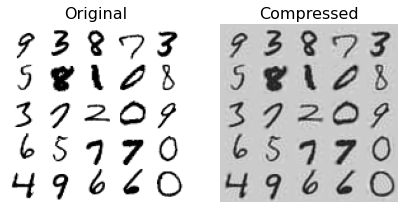

In [32]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.title("Original", fontsize=16)
plt.subplot(122)
plot_digits(X_recovered[::2100])
plt.title("Compressed", fontsize=16)

plt.show()

In [33]:
X_reduced_pca = X_reduced

### 랜덤 PCA

svd_solver 매개변수를 'randomized'로 지정하면 사이킷런은 랜덤 PCA라 부르는 확률적 알고리즘을 사용해 처음 d개의 주성분에 대한 근삿값을 빠르게 찾는다. 알고리즘의 계산 복잡도는 완전한 SVD 방식인 $O(Mxn2) + O(n2)$이 아닌 $O(m x d2) + O(d2)$ 이다. 따라서 d가 n보다 많이 작으면 SVD보다 훨씬 빠르다.

In [34]:
rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

X_reduced

array([[-5.63825594e+02,  3.76211585e+02,  5.47809263e+02, ...,
        -2.65338430e+01,  3.49757836e+01,  5.09185565e+01],
       [-2.47606773e+02,  5.94115813e+02, -7.61176589e+02, ...,
         8.25782712e+01, -2.01359964e+00,  1.26253885e+01],
       [-7.61068948e+01, -7.18886267e+02, -6.21347158e+02, ...,
         7.20428267e+01,  3.34597149e+01,  5.26661081e+01],
       ...,
       [ 4.46897686e+02,  2.00538445e+02, -3.26087854e+02, ...,
        -2.50229406e+01, -1.86528406e+01, -4.60240212e+01],
       [ 7.94828987e+02, -1.64978790e+02,  4.84146892e+01, ...,
        -3.54576665e+01,  3.15203121e+01, -6.48285594e-01],
       [-9.03114239e+02, -4.56076540e+02, -1.39585123e+02, ...,
        -3.08430066e+01, -2.23779276e+01,  3.54949643e+01]])

svd_solver의 기본값은 'auto'이다. m 이나 n이 500보다 크고 d가 m이나 n의 80%보다 작으면 사이킷런은 자동으로 랜덤 PCA알고리즘을 사용한다. 아니면 완전한 SVD방식을 사용한다. 

### 점진적 PCA

PCA 구현의 문제는 SVD알고리즘을 실행하기 위해 전체 훈련 세트를 메모리에 올려야 한다는 것이다. 점진적 PCA 알고리즘은 훈련세트를 미니배치로 나눈 뒤 IPCA 알고리즘에 한 번에 하나씩 주입한다. 이런 방식은 훈련 세트가 클 때 유용하고 새로운 데이터가 준비되는 대로 실시간으로 PCA를 적용할 수 있다. 



In [35]:
from sklearn.decomposition import IncrementalPCA

n_batches = 100
inc_pca = IncrementalPCA(n_components=154)

# np.array_split 함수를 통해 100개의 미니배치로 나눔 
for X_batch in np.array_split(X_train, n_batches):
    print(".", end="") 
    
    # 전체 훈련 세트를 사용하는 fit() 이 아닌 partial_fit()을 통해 미니배치 호출 
    inc_pca.partial_fit(X_batch)

X_reduced = inc_pca.transform(X_train)

....................................................................................................

In [36]:
X_recovered_inc_pca = inc_pca.inverse_transform(X_reduced)

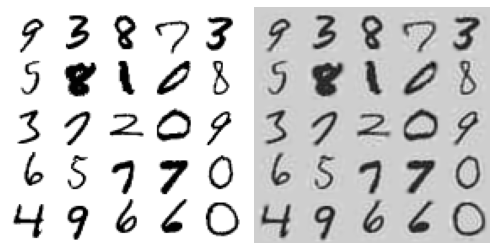

In [37]:
plt.figure(figsize=(7, 4))
plt.subplot(121)
plot_digits(X_train[::2100])
plt.subplot(122)
plot_digits(X_recovered_inc_pca[::2100])
plt.tight_layout()

In [38]:
# 일반 PCA와 점진적 PCA로 MNIST 데이터를 변환한 결과를 비교, 평균이 같은지 확인
np.allclose(pca.mean_, inc_pca.mean_)

True

In [39]:
# 하지만 결과는 완전히 동일하지 않다, 점진적 PCA는 아주 훌륭한 근사치를 제공하지만 완벽하지는 않다. 

np.allclose(X_reduced_pca, X_reduced)

False

**`memmap()` 사용하기**

memmap 파이썬 클래스를 사용해 하드 디스크의 이진 파일에 저장된 매우 큰 배열을 메모리에 들어 있는 것처럼 다루는 것, 파이썬 클래스는 필요할때 데이터를 메모리에 적재한다. 

In [40]:
filename = "my_mnist.data"
m, n = X_train.shape

X_mm = np.memmap(filename, dtype='float32', mode='write', shape=(m, n))
X_mm[:] = X_train

In [41]:
# 데이터가 디스크에 저장되었는지 확인하기 위해 `memmap()` 객체를 삭제

del X_mm

In [42]:
X_mm = np.memmap(filename, dtype="float32", mode="readonly", shape=(m, n))

batch_size = m // n_batches
inc_pca = IncrementalPCA(n_components=154, batch_size=batch_size)
inc_pca.fit(X_mm)

IncrementalPCA(batch_size=525, n_components=154)

**시간 복잡도**

In [43]:
# 주성분 개수를 바꾸어가며 점진적 PCA와 랜덤 PCA에 비해 일반 PCA 시간을 확인 

rnd_pca = PCA(n_components=154, svd_solver="randomized", random_state=42)
X_reduced = rnd_pca.fit_transform(X_train)

In [44]:
import time

for n_components in (2, 10, 154):
    print("n_components =", n_components)
    regular_pca = PCA(n_components=n_components, svd_solver="full")
    inc_pca = IncrementalPCA(n_components=n_components, batch_size=500)
    rnd_pca = PCA(n_components=n_components, random_state=42, svd_solver="randomized")

    for pca in (regular_pca, inc_pca, rnd_pca):
        t1 = time.time()
        pca.fit(X_train)
        t2 = time.time()
        print("    {}: {:.1f} 초".format(pca.__class__.__name__, t2 - t1))

n_components = 2
    PCA: 4.0 초
    IncrementalPCA: 9.3 초
    PCA: 0.9 초
n_components = 10
    PCA: 4.2 초
    IncrementalPCA: 9.2 초
    PCA: 1.2 초
n_components = 154
    PCA: 4.3 초
    IncrementalPCA: 12.8 초
    PCA: 3.4 초


Text(0.5, 1.0, 'PCA and Randomized PCA time complexity ')

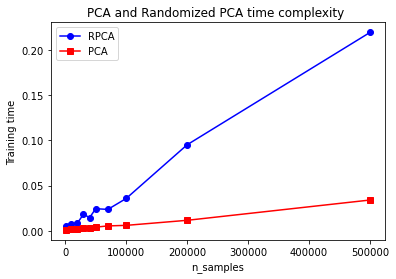

In [45]:
# 데이터셋의 크기(샘플의 수)를 바꾸어가며 일반 PCA와 랜덤 PCA를 비교

times_rpca = []
times_pca = []
sizes = [1000, 10000, 20000, 30000, 40000, 50000, 70000, 100000, 200000, 500000]
for n_samples in sizes:
    X = np.random.randn(n_samples, 5)
    pca = PCA(n_components=2, svd_solver="randomized", random_state=42)
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_samples")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")

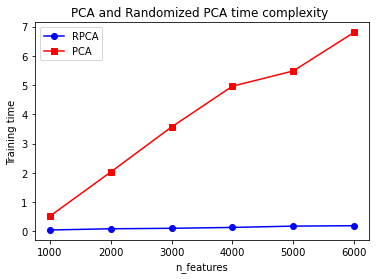

In [46]:
# 특성의 개수를 달리하면서 2,000 샘플이 있는 데이터셋에서 성능을 비교

times_rpca = []
times_pca = []
sizes = [1000, 2000, 3000, 4000, 5000, 6000]
for n_features in sizes:
    X = np.random.randn(2000, n_features)
    pca = PCA(n_components=2, random_state=42, svd_solver="randomized")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_rpca.append(t2 - t1)
    pca = PCA(n_components=2, svd_solver="full")
    t1 = time.time()
    pca.fit(X)
    t2 = time.time()
    times_pca.append(t2 - t1)

plt.plot(sizes, times_rpca, "b-o", label="RPCA")
plt.plot(sizes, times_pca, "r-s", label="PCA")
plt.xlabel("n_features")
plt.ylabel("Training time")
plt.legend(loc="upper left")
plt.title("PCA and Randomized PCA time complexity ")
plt.show()

## 커널 PCA

In [47]:
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=42)

In [48]:
from sklearn.decomposition import KernelPCA

rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.04)
X_reduced = rbf_pca.fit_transform(X)

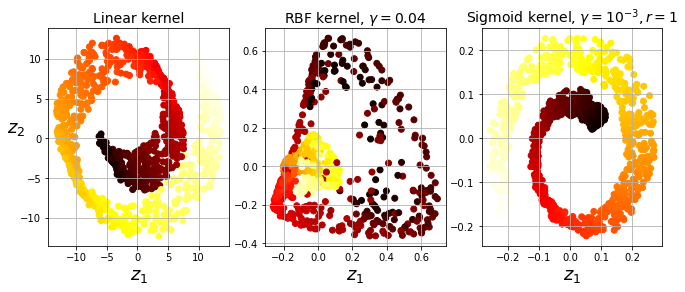

In [49]:
from sklearn.decomposition import KernelPCA

lin_pca = KernelPCA(n_components=2, kernel="linear", fit_inverse_transform=True)
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433, fit_inverse_transform=True)
sig_pca = KernelPCA(n_components=2, kernel="sigmoid", gamma=0.001, coef0=1, fit_inverse_transform=True)

y = t > 6.9

plt.figure(figsize=(11, 4))
for subplot, pca, title in ((131, lin_pca, "Linear kernel"), (132, rbf_pca, "RBF kernel, $\gamma=0.04$"), (133, sig_pca, "Sigmoid kernel, $\gamma=10^{-3}, r=1$")):
    X_reduced = pca.fit_transform(X)
    if subplot == 132:
        X_reduced_rbf = X_reduced
    
    plt.subplot(subplot)
    #plt.plot(X_reduced[y, 0], X_reduced[y, 1], "gs")
    #plt.plot(X_reduced[~y, 0], X_reduced[~y, 1], "y^")
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()

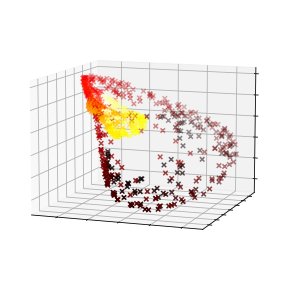

In [50]:
plt.figure(figsize=(6, 5))

X_inverse = rbf_pca.inverse_transform(X_reduced_rbf)

ax = plt.subplot(111, projection='3d')
ax.view_init(10, -70)
ax.scatter(X_inverse[:, 0], X_inverse[:, 1], X_inverse[:, 2], c=t, cmap=plt.cm.hot, marker="x")
ax.set_xlabel("")
ax.set_ylabel("")
ax.set_zlabel("")
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

plt.show()

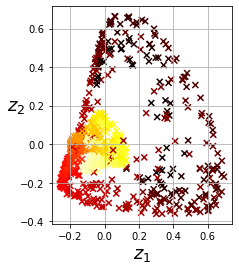

In [51]:
X_reduced = rbf_pca.fit_transform(X)

plt.figure(figsize=(11, 4))
plt.subplot(132)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot, marker="x")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)

## 커널 선택과 하이퍼파라미터 튜닝

KPAC는 비지도 학습이기 때문에 좋은 커널과 하이퍼파라미터를 선택하기 위한 명확한 성능 측정 기준이 없다. 하지만 차원 축소는 종종 지도학습의 전처리 단계로 활용되므로 그리드 탐색을 사용하여 주어진 문제에서 성능이 좋은 커널과 하이퍼파라미터를 선택할 수 있다. 

In [52]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

clf = Pipeline([
        ("kpca", KernelPCA(n_components=2)),
        ("log_reg", LogisticRegression(solver="lbfgs"))
    ])

param_grid = [{
        "kpca__gamma": np.linspace(0.03, 0.05, 10),
        "kpca__kernel": ["rbf", "sigmoid"]
    }]

grid_search = GridSearchCV(clf, param_grid, cv=3)
grid_search.fit(X, y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('kpca', KernelPCA(n_components=2)),
                                       ('log_reg', LogisticRegression())]),
             param_grid=[{'kpca__gamma': array([0.03      , 0.03222222, 0.03444444, 0.03666667, 0.03888889,
       0.04111111, 0.04333333, 0.04555556, 0.04777778, 0.05      ]),
                          'kpca__kernel': ['rbf', 'sigmoid']}])

In [53]:
print(grid_search.best_params_)

{'kpca__gamma': 0.043333333333333335, 'kpca__kernel': 'rbf'}


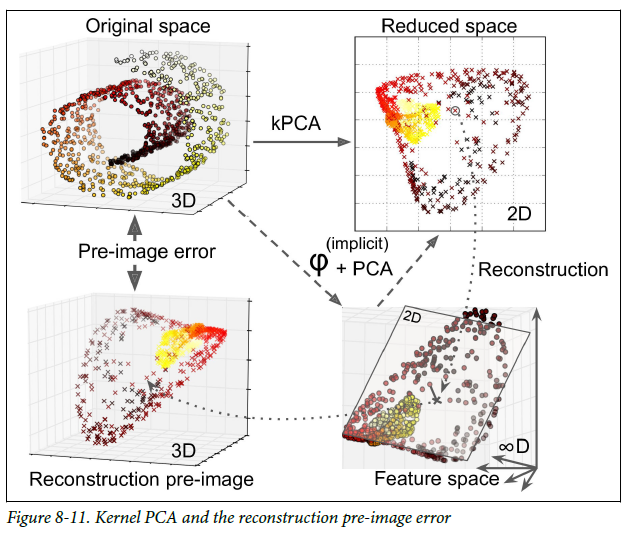

완전한 비지도 학습 방법으로, 가장 낮은 재구성 오차를 만드는 커널과 하이퍼파라미터를 선택하는 방식도 있다. 하지만 재구성은 선형 PCA만큼 쉽지 않다. 
스위스롤의 원본 3D 데이터셋과 RBF 커널의 KPCA를 적용한 2D 데이터셋을 보여준다. 

커널트릭 덕분에 변환은 특성맵을 사용하여 훈련 세트를 무한 차원이 특성 공간에 매핑한 다음, 변환된 데이터셋을 선형 PCA를 사용해 2D로 투영한 것과 수학적으로 동일하다. 

축소된 공간에 있는 샘플에 대해 선형 PCA를 역전시키면 재구성된 데이터 포인트는 원본 공간이 아닌 특성 공간에 놓이게 된다. 특성 공간은 무한 차원이기 때문에 재구성된 포인트를 계산할 수 없고 재구성에 따른 실제 에러를 계산할 수 없다. 다행히 재구성된 포인트에 가깝게 매핑된 원본 공간의 포인트를 찾을 수 있다. 이를 **재구성 원상**이라고 한다. 원산을 얻게 되면 원본 샘플과의 제곱 거리를 측정할 수 있다. 재구성 원상의 오차를 최소화 하는 커널과 하이퍼파라미터를 선택할 수 있다. 

재구성을 하는 한가지 방법은 투영된 샘플을 훈련 세트로, 원본 샘플을 타깃으로 하는 지도 학습 모델을 훈련시키는 것이다.   

fit_inverse_transform = True

In [54]:
rbf_pca = KernelPCA(n_components=2, kernel="rbf", gamma=0.0433,
                    fit_inverse_transform=True)
X_reduced = rbf_pca.fit_transform(X)
X_preimage = rbf_pca.inverse_transform(X_reduced)

In [55]:
from sklearn.metrics import mean_squared_error

mean_squared_error(X, X_preimage)

32.78630879576613

## LLE , locally linear embedding (지역 선형 임베딩) 

NLDR, nonlinear dimensionality reduction (비선형 차원축소) 기술로 이전 알고리즘 처럼 투영에 의존하지 않는 매니폴드 학습이다.  
LLE는 먼저 각 훈련 샘플이 가장 가까운 이웃에 얼마나 선형적으로 연관되어 있는지 측정한다. 그 다음 국부적인 관계가 가장 잘 보존되는 훈련세트의 저차원 표현을 찾는다. 이 방법은 잡음이 너무 많지 않은 경우 꼬인 매니폴드를 펼치는데 잘 작동 한다. 

In [56]:
X, t = make_swiss_roll(n_samples=1000, noise=0.2, random_state=41)

In [57]:
from sklearn.manifold import LocallyLinearEmbedding

lle = LocallyLinearEmbedding(n_components=2, n_neighbors=10, random_state=42)
X_reduced = lle.fit_transform(X)

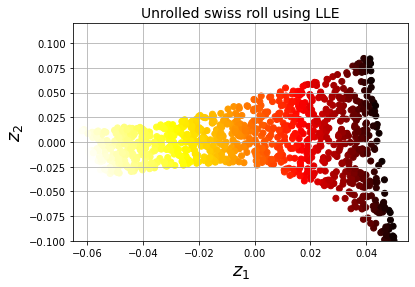

In [58]:
plt.title("Unrolled swiss roll using LLE", fontsize=14)
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18)
plt.axis([-0.065, 0.055, -0.1, 0.12])
plt.grid(True)


plt.show()

스위스롤이 완전히 펼쳐졌고 지역적으로는 샘플 간 거리가 잘 보존되어 있다. 그러나 크게 보면 샘플 간 거리가 잘 유지되어 있지 않다. 펼쳐진 스위스 롤의 오른쪽은 압축되어 있고 왼쪽은 확장되어 있다. 그러나 LLE는 매니폴드를 모델링하는데는 잘 동작한다. 

## 다른 차원 축소 기법 

### 랜덤투영 
랜덤한 선형투영을 사용해 데이터를 저차원 공간으로 투영한다. 

### MDS, Multidimesional scaling (다차원 스케일징 )

샘플간의 거리를 보존하면서 차원을 축소한다. 

In [59]:
from sklearn.manifold import MDS

mds = MDS(n_components=2, random_state=42)
X_reduced_mds = mds.fit_transform(X)

### Isomap

각 샘플을 가장 가까운 이웃과 연결하는 식으로 그래프를 만든다. 샘플 간의 geodesic distance를 유지하면서 차원을 축소한다. 

In [61]:
from sklearn.manifold import Isomap

isomap = Isomap(n_components=2)
X_reduced_isomap = isomap.fit_transform(X)

### t-SNE ,t-distributed stochastic neighbor embedding 

비슷한 샘플이 가까이, 비슷하지 않은 샘플은 멀리 떨어지도록 하면서 차원을 축소한다. 주로 시각화에 많이 사용되며 고차원 공간에 있는 샘플의 군집을 시각화
할때 사용된다. 

In [62]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

### LDA, linear discriminant analysis (선형 판별 분석)

분류 알고리즘으로 훈련 과정에서 클래스 사이를 가장 잘 구분하는 축을 학습한다. 이 축은 데이터가 투영되는 초평면을 정의하는데 사용할 수 있다. 알고리즘의 장점은 투영을 통해 가능한 한 클래스를 멀리 떨어지게 유지시키므로 SVM 분류기 같은 다른 분류 알고리즘을 적용하기 전에 차원을 축소시키는데 좋다. 

In [63]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
X_mnist = mnist["data"]
y_mnist = mnist["target"]
lda.fit(X_mnist, y_mnist)
X_reduced_lda = lda.transform(X_mnist)

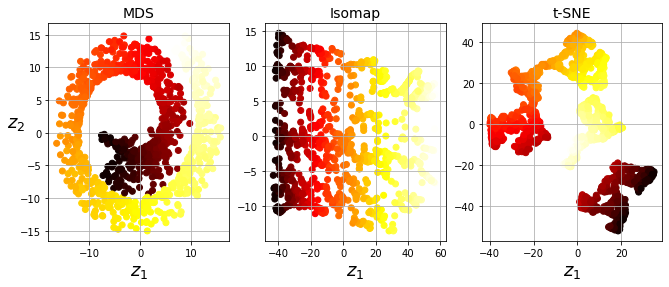

In [64]:
titles = ["MDS", "Isomap", "t-SNE"]

plt.figure(figsize=(11,4))

for subplot, title, X_reduced in zip((131, 132, 133), titles,
                                     (X_reduced_mds, X_reduced_isomap, X_reduced_tsne)):
    plt.subplot(subplot)
    plt.title(title, fontsize=14)
    plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=t, cmap=plt.cm.hot)
    plt.xlabel("$z_1$", fontsize=18)
    if subplot == 131:
        plt.ylabel("$z_2$", fontsize=18, rotation=0)
    plt.grid(True)

plt.show()